In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [67]:
PATH = '/home/sanjay/2022-game-app/frontend/assets/img/card-*'
loc_list = glob.glob(PATH)
for l in loc_list: print(l)

/home/sanjay/2022-game-app/frontend/assets/img/card-colors
/home/sanjay/2022-game-app/frontend/assets/img/card-handles
/home/sanjay/2022-game-app/frontend/assets/img/card-pedals
/home/sanjay/2022-game-app/frontend/assets/img/card-seats
/home/sanjay/2022-game-app/frontend/assets/img/card-wheels


In [110]:
def read_images(loc):
    fnames = glob.glob(f'{loc}/*.jpg')
    
    img_list = []
    for f in fnames:
        img = cv2.imread(f)
        img_list.append(img)
        
    return img_list

def plot_images(img_list):
    plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=len(img_list), figsize=(10,10))
    for idx, img in enumerate(img_list):
        ax[idx].imshow(img)
        
def matches(img_list, method=cv2.TM_SQDIFF_NORMED):
    N = len(img_list)
    
    scores = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N): #it's okay, compute most twice
            res = cv2.matchTemplate(img_list[i], img_list[j], method)
            scores[i][j] = res
            
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            #print(min_val, max_val, min_loc, max_loc)
            #print(f'---')   
            
    return scores

def plot_best_match(img_list, scores):
    assert (len(img_list)==scores.shape[0]==scores.shape[1])
    
    for i in range(len(img_list)):
        plt.figure()
        fig, ax = plt.subplots(nrows=1, ncols=scores.shape[0]+1, figsize=(10,10))
        score_sorted = scores[i].argsort()
        
        ax[0].imshow(img_list[i])
        for idx, s in enumerate(score_sorted):
            ax[idx+1].imshow(img_list[s])
            ax[idx+1].set_title(f'{scores[i][s]:.2f}', rotation=90)
        

def compute_matches(loc):
    img_list = read_images(loc) #read jpg images
    plot_images(img_list) #plot images
    scores = matches(img_list) #compute scores (simple square diffs)
    
    plt.figure()
    plt.imshow(scores) #plot scores matrix
    print(scores)
    
    plot_best_match(img_list, scores)

### Results

Output:

Row of unique images for each component

Matrix of scores (ignore)

One row per image: first image is target image followed by best matches (titles are scores - lower is better)

TODO:

explore different matching criteria

add bounding box if size of image doesn't match size of template

[[2.34947137e-07 1.71713065e-02 8.83057043e-02 3.12943049e-02
  1.15010880e-01]
 [1.71713065e-02 0.00000000e+00 1.04264766e-01 6.44853637e-02
  1.55092746e-01]
 [8.83057043e-02 1.04264766e-01 0.00000000e+00 8.25587958e-02
  6.83548450e-02]
 [3.12943049e-02 6.44853637e-02 8.25587958e-02 1.60391309e-07
  4.10692766e-02]
 [1.15010880e-01 1.55092746e-01 6.83548450e-02 4.10692766e-02
  0.00000000e+00]]


<Figure size 432x288 with 0 Axes>

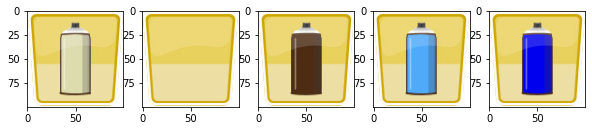

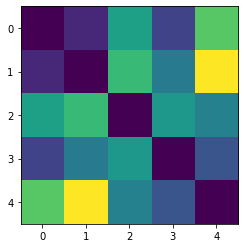

<Figure size 432x288 with 0 Axes>

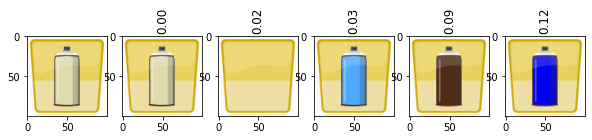

<Figure size 432x288 with 0 Axes>

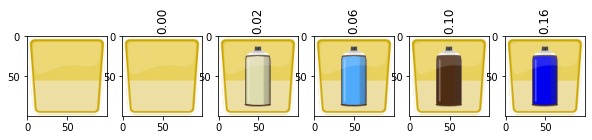

<Figure size 432x288 with 0 Axes>

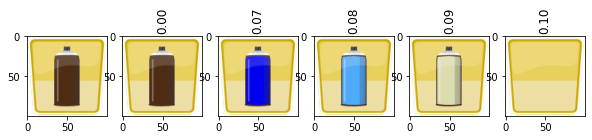

<Figure size 432x288 with 0 Axes>

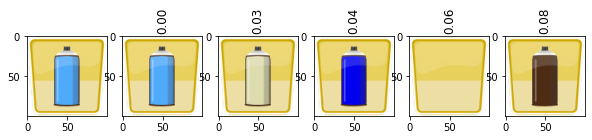

<Figure size 432x288 with 0 Axes>

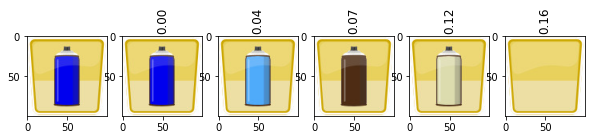

In [111]:
compute_matches(loc_list[0])

[[1.75173582e-07 2.89450772e-02 2.46622209e-02 3.26792300e-02
  3.66920382e-02]
 [2.89450772e-02 3.04468017e-07 3.19658518e-02 3.97066325e-02
  4.28400673e-02]
 [2.46622209e-02 3.19658518e-02 6.44175913e-08 3.22126970e-02
  3.81845422e-02]
 [3.26792300e-02 3.97066325e-02 3.22126970e-02 1.02130429e-07
  5.05680107e-02]
 [3.66920382e-02 4.28400673e-02 3.81845422e-02 5.05680107e-02
  0.00000000e+00]]


<Figure size 432x288 with 0 Axes>

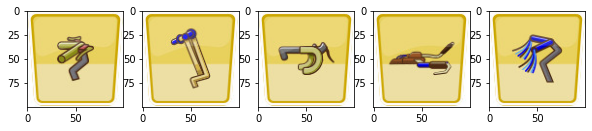

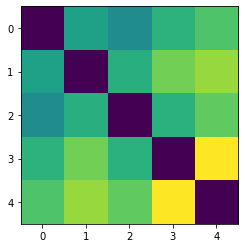

<Figure size 432x288 with 0 Axes>

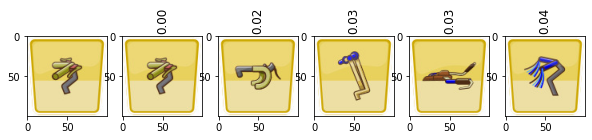

<Figure size 432x288 with 0 Axes>

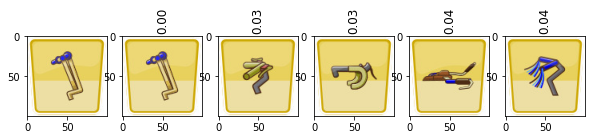

<Figure size 432x288 with 0 Axes>

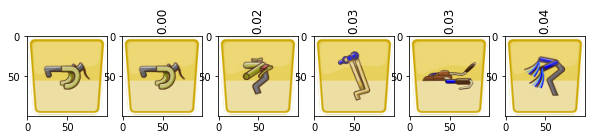

<Figure size 432x288 with 0 Axes>

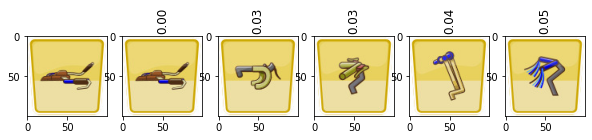

<Figure size 432x288 with 0 Axes>

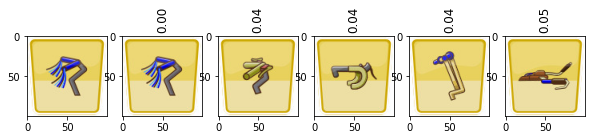

In [112]:
compute_matches(loc_list[1])

[[5.22367287e-08 6.63031042e-02 3.54859717e-02 5.49062826e-02
  7.99152479e-02]
 [6.63031042e-02 6.78417038e-08 5.29507026e-02 6.31120801e-02
  6.39090538e-02]
 [3.54859717e-02 5.29507026e-02 0.00000000e+00 5.24083339e-02
  7.09080920e-02]
 [5.49062826e-02 6.31120801e-02 5.24083339e-02 5.39691776e-08
  8.11989158e-02]
 [7.99152479e-02 6.39090538e-02 7.09080920e-02 8.11989158e-02
  1.50142512e-07]]


<Figure size 432x288 with 0 Axes>

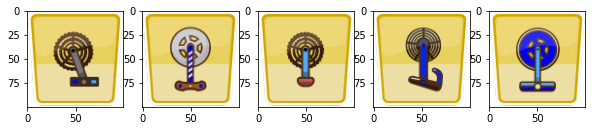

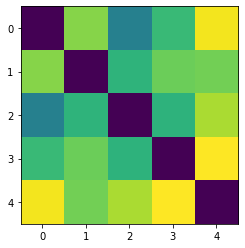

<Figure size 432x288 with 0 Axes>

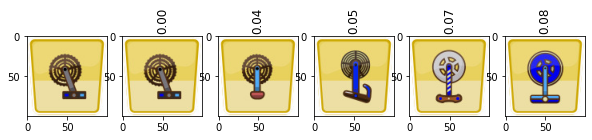

<Figure size 432x288 with 0 Axes>

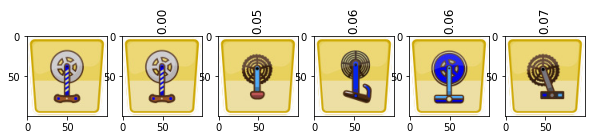

<Figure size 432x288 with 0 Axes>

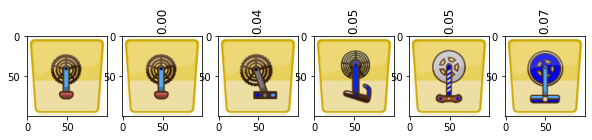

<Figure size 432x288 with 0 Axes>

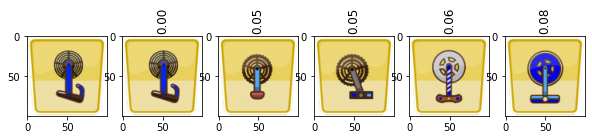

<Figure size 432x288 with 0 Axes>

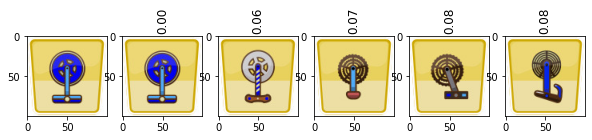

In [113]:
compute_matches(loc_list[2])

[[1.26450729e-07 3.82157415e-02 2.37914734e-02 4.34343778e-02
  9.13302749e-02]
 [3.82157415e-02 1.26067903e-07 5.20463325e-02 4.81388532e-02
  1.05240881e-01]
 [2.37914734e-02 5.20463325e-02 0.00000000e+00 3.61679457e-02
  9.13590789e-02]
 [4.34343778e-02 4.81388532e-02 3.61679457e-02 3.60560705e-07
  1.04183234e-01]
 [9.13302749e-02 1.05240881e-01 9.13590789e-02 1.04183234e-01
  0.00000000e+00]]


<Figure size 432x288 with 0 Axes>

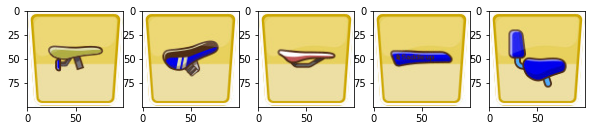

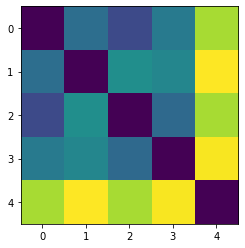

<Figure size 432x288 with 0 Axes>

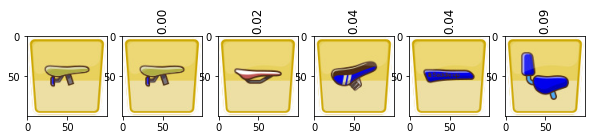

<Figure size 432x288 with 0 Axes>

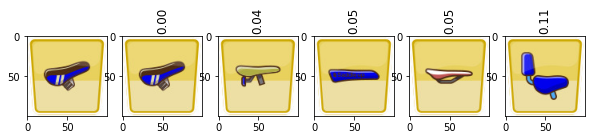

<Figure size 432x288 with 0 Axes>

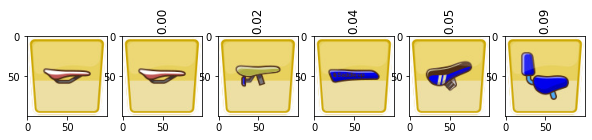

<Figure size 432x288 with 0 Axes>

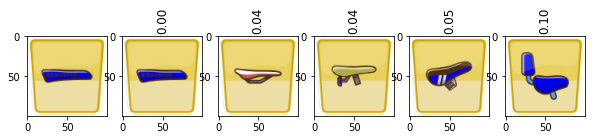

<Figure size 432x288 with 0 Axes>

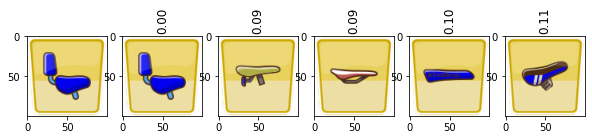

In [114]:
compute_matches(loc_list[3])

[[1.52053488e-07 5.42209670e-02 5.42769097e-02 7.94094801e-02
  5.72506301e-02]
 [5.42209670e-02 0.00000000e+00 9.96382385e-02 1.39078736e-01
  3.23709324e-02]
 [5.42769097e-02 9.96382385e-02 0.00000000e+00 2.76367180e-02
  8.18827748e-02]
 [7.94094801e-02 1.39078736e-01 2.76367180e-02 3.88252914e-08
  1.16457976e-01]
 [5.72506301e-02 3.23709324e-02 8.18827748e-02 1.16457976e-01
  0.00000000e+00]]


<Figure size 432x288 with 0 Axes>

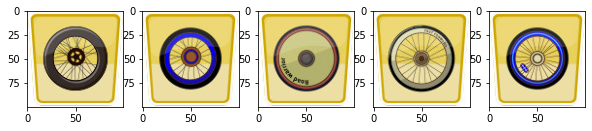

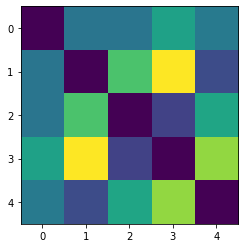

<Figure size 432x288 with 0 Axes>

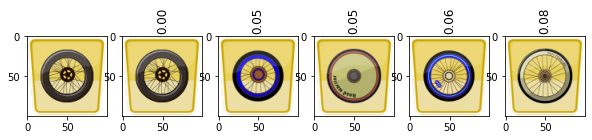

<Figure size 432x288 with 0 Axes>

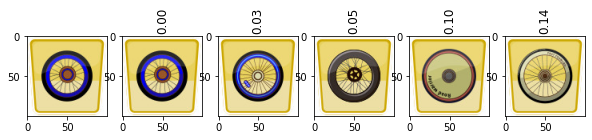

<Figure size 432x288 with 0 Axes>

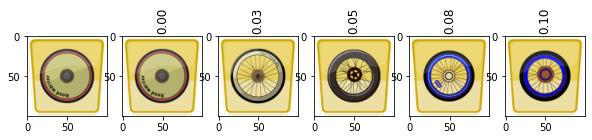

<Figure size 432x288 with 0 Axes>

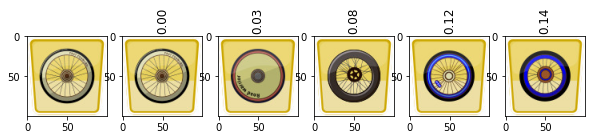

<Figure size 432x288 with 0 Axes>

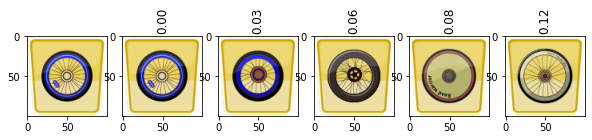

In [115]:
compute_matches(loc_list[4])